## Setup

*Install any packages here and load data*

In [2]:
# Add any additional libraries or submodules below
from sklearn.impute import KNNImputer
# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [5]:
# Load the imputed DataFrame from the CSV file next time
df = pd.read_csv("easyshare_imputed.csv")

df.describe()

,int_year,wave,country,country_mod,female,age,birth_country,citizenship,isced1997_r,eduyears_mod,...,bmi2,smoking,ever_smoked,br010_mod,br015_,casp,chronic_mod,sp008_,ch001_,cogscore
count,98348.000000,98348.000000,98348.000000,98348.000000,98348.00000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,...,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000
mean,2010.467537,3.794612,24.272080,384.954135,0.54148,67.938640,398.473742,391.844096,2.658916,10.357658,...,2.850427,4.341156,3.256001,3.314380,2.673516,36.650172,1.306011,3.976654,2.173244,11.973714
std,4.609446,2.135395,12.237044,228.120624,0.49580,8.820107,236.258350,231.801339,1.486118,4.098175,...,0.751233,1.473567,1.971830,2.080354,1.317733,6.174605,1.263177,1.641224,1.394208,4.163572
min,2004.000000,1.000000,11.000000,40.000000,0.00000,55.099998,2.000000,4.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,0.000000,1.000000,0.000000,0.000000
25%,2006.000000,2.000000,15.000000,208.000000,0.00000,60.599998,208.000000,208.000000,1.000000,8.000000,...,2.000000,5.000000,1.000000,1.000000,1.000000,32.800000,0.000000,3.400000,1.000000,9.000000
50%,2011.000000,4.000000,20.000000,348.000000,1.00000,66.699997,348.000000,348.000000,3.000000,10.800000,...,3.000000,5.000000,5.000000,3.000000,3.000000,37.000000,1.000000,5.000000,2.000000,12.000000
75%,2013.000000,5.000000,31.000000,616.000000,1.00000,74.000000,620.000000,620.000000,3.000000,13.000000,...,3.000000,5.000000,5.000000,4.600000,4.000000,41.000000,2.000000,5.000000,3.000000,15.000000
max,2020.000000,8.000000,63.000000,756.000000,1.00000,111.599998,1101.000000,1132.000000,6.000000,30.000000,...,4.000000,5.000000,5.000000,7.000000,4.000000,48.000000,9.000000,5.000000,17.000000,26.000000


Data shows that, with population aging, dementia in the European population over 55 years old is a significant public health issue. To address the dementia prevalence across different age groups, we will divide the dataset into subsets labeled by age groups. Additionally, in Europe, the prevalence of dementia in the population over 55 increases with age. According to data from Alzheimer Europe, the prevalence rates for dementia by age group are as follows: 0.6% for 60-64 years old, 1.3% for 65-69 years old, 3.3% for 70-74 years old, 8% for 75-79 years old, 12.1% for 80-84 years old, 21.9% for 85-89 years old, and 40.8% for those over 90【[source](https://www.alzheimer-europe.org/dementia/prevalence-dementia-europe?language_content_entity=en)】. Additionally, a systematic review and meta-analysis of 9 studies conducted in Europe between 1993 and 2018 shows that, after adjusting for age and sex, the average prevalence rate of dementia was 7.1%【[source](https://pubmed.ncbi.nlm.nih.gov/30412486/)】.

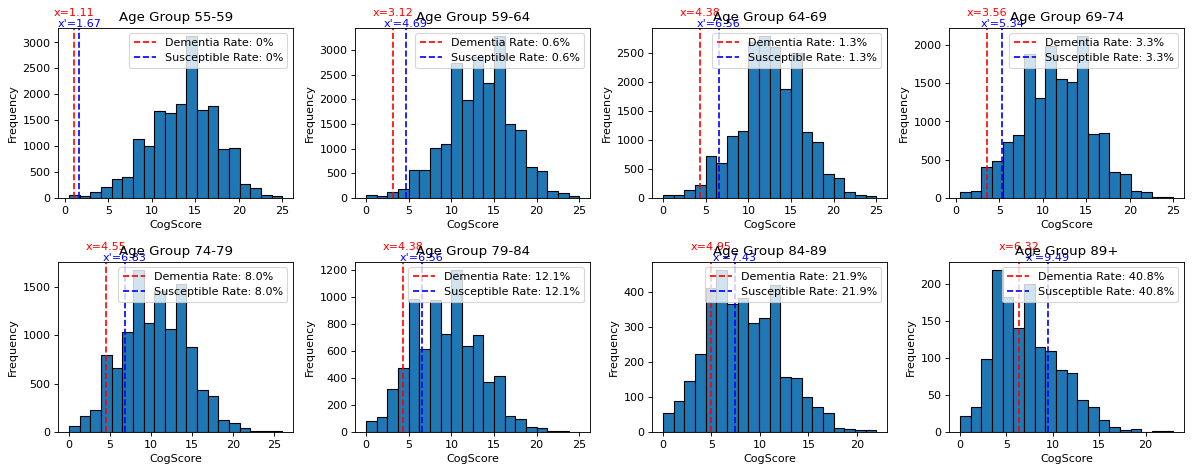

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假设df是你的DataFrame
# 定义年龄分段和对应的痴呆患病率
bins = [0, 59, 64, 69, 74, 79, 84, 89, float('inf')]
labels = ['55-59','59-64', '64-69', '69-74', '74-79', '79-84', '84-89', '89+']
dementia_rates = [0, 0.6, 1.3, 3.3, 8.0, 12.1, 21.9, 40.8]  # 对应每个年龄段的痴呆患病率

# 创建一个新列来表示年龄分组
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 分别获取各个年龄组的子集
age_groups = {}
for label in labels:
    age_groups[label] = df[df['age_group'] == label]

n_groups = len(age_groups)
n_cols = 4  # 假设每行显示4个直方图
n_rows = n_groups // n_cols + (1 if n_groups % n_cols > 0 else 0)

plt.figure(figsize=(15, 3 * n_rows))

for i, (label, group_df) in enumerate(age_groups.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    counts, bins, patches = plt.hist(group_df['cogscore'], bins=20, edgecolor='black')
    
    # 计算累积频率百分比
    cumulative_frequency = np.cumsum(counts) / sum(counts) * 100
    # 找到对应患病率的cogscore
    rate = dementia_rates[min(i-1, len(dementia_rates)-1)]  # 确保索引不会越界
    rate_index = np.where(cumulative_frequency >= rate)[0][0]  # 找到第一个超过给定患病率的索引
    cogscore_at_rate = (bins[rate_index] + bins[rate_index + 1]) / 2  # 计算对应的cogscore
    susceptible_at_rate = cogscore_at_rate * 1.5

    plt.axvline(x=cogscore_at_rate, color='r', linestyle='--', label=f'Dementia Rate: {rate}%')

    plt.axvline(x=susceptible_at_rate, color='b', linestyle='--', label=f'Susceptible Rate: {rate}%')
    # 在红线上方标注cogscore值
    plt.text(cogscore_at_rate, plt.ylim()[1]*1.07, f'x={cogscore_at_rate:.2f}', color='red', ha='center')
    
    plt.text(susceptible_at_rate, plt.ylim()[1]*1.005, f'x\'={susceptible_at_rate:.2f}', color='blue', ha='center')
    
    plt.title(f'Age Group {label}')
    plt.xlabel('CogScore')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


In [59]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

# 对每个年龄组分别进行处理和SVM分类
for i, (label, group_df) in enumerate(age_groups.items()):
    # 根据cogscore_at_rate分为两类
    rate = dementia_rates[min(i, len(dementia_rates)-1)]

    
    # 计算累积频率百分比
    cumulative_frequency = np.cumsum(counts) / sum(counts) * 100
    # 找到对应患病率的cogscore
    rate = dementia_rates[min(i-1, len(dementia_rates)-1)]  # 确保索引不会越界
    rate_index = np.where(cumulative_frequency >= rate)[0][0]  # 找到第一个超过给定患病率的索引
    cogscore_at_rate = (bins[rate_index] + bins[rate_index + 1]) / 2  # 计算对应的cogscore

    group_df['class'] = (group_df['cogscore'] >= cogscore_at_rate).astype(int)
    
    # 分割数据为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(
        group_df[['cogscore']], group_df['class'], test_size=0.2, random_state=42
    )
    
    # 训练SVM模型
    clf = svm.SVC(kernel='linear')  # 使用线性核
    clf.fit(X_train, y_train)
    
    # 进行预测
    y_pred = clf.predict(X_test)
    
    # 评估模型
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Age Group: {label}")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(report)
    print("\n")


C:\Users\李传昊\AppData\Local\Temp\ipykernel_20844\1520421364.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['class'] = (group_df['cogscore'] >= cogscore_at_rate).astype(int)
C:\Users\李传昊\AppData\Local\Temp\ipykernel_20844\1520421364.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['class'] = (group_df['cogscore'] >= cogscore_at_rate).astype(int)
C:\Users\李传昊\AppData\Local\Temp\ipykernel_20844\1520421364.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Age Group: 55-59
Accuracy: 1.0
Confusion Matrix:
[[ 144    0]
 [   0 3353]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00      3353

    accuracy                           1.00      3497
   macro avg       1.00      1.00      1.00      3497
weighted avg       1.00      1.00      1.00      3497



Age Group: 59-64
Accuracy: 1.0
Confusion Matrix:
[[   8    0]
 [   0 4222]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00      4222

    accuracy                           1.00      4230
   macro avg       1.00      1.00      1.00      4230
weighted avg       1.00      1.00      1.00      4230



Age Group: 64-69
Accuracy: 1.0
Confusion Matrix:
[[   6    0]
 [   0 3892]]
Classification Report:
              precision    recall  f1-score  

C:\Users\李传昊\AppData\Local\Temp\ipykernel_20844\1520421364.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['class'] = (group_df['cogscore'] >= cogscore_at_rate).astype(int)
C:\Users\李传昊\AppData\Local\Temp\ipykernel_20844\1520421364.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['class'] = (group_df['cogscore'] >= cogscore_at_rate).astype(int)
C:\Users\李传昊\AppData\Local\Temp\ipykernel_20844\1520421364.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Age Group: 69-74
Accuracy: 1.0
Confusion Matrix:
[[  16    0]
 [   0 3079]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00      3079

    accuracy                           1.00      3095
   macro avg       1.00      1.00      1.00      3095
weighted avg       1.00      1.00      1.00      3095



Age Group: 74-79
Accuracy: 1.0
Confusion Matrix:
[[  45    0]
 [   0 2304]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00      2304

    accuracy                           1.00      2349
   macro avg       1.00      1.00      1.00      2349
weighted avg       1.00      1.00      1.00      2349



Age Group: 79-84
Accuracy: 1.0
Confusion Matrix:
[[ 153    0]
 [   0 1419]]
Classification Report:
              precision    recall  f1-score  

C:\Users\李传昊\AppData\Local\Temp\ipykernel_20844\1520421364.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['class'] = (group_df['cogscore'] >= cogscore_at_rate).astype(int)
